Решение задачи 2 по физико-химической гидрогеодинамике с помощью численного расчета преобразования Лапласа-Карсона

In [103]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats

In [251]:
bound = 0.08# g/l
x = 1.2 #meters
num_data_points = 14 # number of data points including initial conditions
list1 = [11,10.10,8.79,7.34,5.85,4.51,3.38,2.47,1.75,1.28,0.90,0.64,0.44, 0.15]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': np.linspace(0,num_data_points-1,num_data_points), 'C, g/l':list1}) 
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())
# Print the output. 
df 


,TimeDays,"C, g/l",c^
0,0.0,11.00,-0.000000
1,1.0,10.10,0.082418
2,2.0,8.79,0.202381
3,3.0,7.34,0.335165
4,4.0,5.85,0.471612
...,...,...,...
9,9.0,1.28,0.890110
10,10.0,0.90,0.924908
11,11.0,0.64,0.948718
12,12.0,0.44,0.967033


Text(0, 0.5, 'Концентрация, [-]')

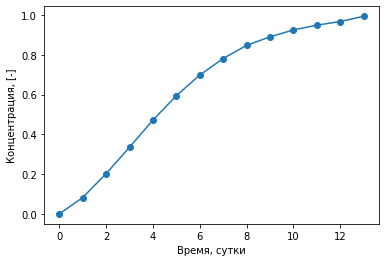

In [252]:
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'], 'o-')
ax.set_xlabel('Время, сутки')
ax.set_ylabel('Концентрация, [-]')

In [378]:
p = [0.5,0.55,0.6,0.8]
#for x in p:
#    print(x)
#p = [0.1,0.8,1.1,1.6]  

In [379]:
integrated = []
for count in p:

    df['laplace'] = df['c^']*np.exp(-count*df['TimeDays'])
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
    s = integrate.trapz(df['laplace'], x=df['TimeDays'])
    s = s*count
    integrated.append(s)
    print('p = ' +str(count) +' int = '+ str(s))
integrated

p = 0.5 int = 0.20441117855494173
p = 0.55 int = 0.18497728469365785
p = 0.6 int = 0.16814615798862267
p = 0.8 int = 0.11971565392793332


[0.20441117855494173,
 0.18497728469365785,
 0.16814615798862267,
 0.11971565392793332]

In [380]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final

,"p, days^-1",U^
0,0.50,0.204411
1,0.55,0.184977
2,0.60,0.168146
3,0.80,0.119716


In [381]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,0.50,0.204411,1.323018,0.377924
1,0.55,0.184977,1.406269,0.391106
2,0.60,0.168146,1.485768,0.403832
3,0.80,0.119716,1.768863,0.452268


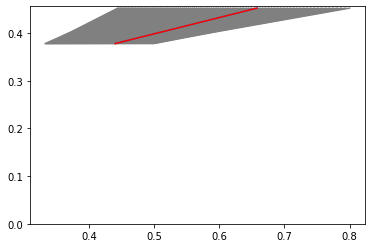

In [382]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = df_final['p, days^-1']/(1+count1*df_final['p, days^-1'])
    ax1.plot(df_final['result'],df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'],df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
ax1.plot(df_final['result'],df_final['p/a'], '-', color = 'red')

In [383]:
df_results.loc[df_results['R2'].idxmax()]
#count1
#df_final[['p/a','result']]

A3           0.270000
R2           0.999999
slope        0.341925
intercept    0.227314
Name: 27, dtype: float64

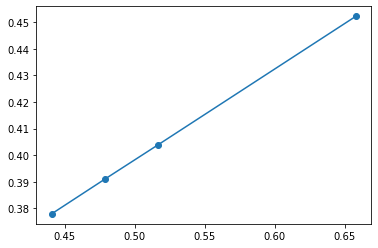

In [384]:
plt.plot(df_final['result'],df_final['p/a'],'o-')

In [385]:
pd.set_option('display.max_rows', 10)
df_results

,A3,R2,slope,intercept
0,0.00,0.999715,0.246589,0.255247
1,0.01,0.999739,0.249856,0.254209
2,0.02,0.999762,0.253144,0.253171
3,0.03,0.999783,0.256453,0.252133
4,0.04,0.999803,0.259781,0.251096
...,...,...,...,...
96,0.96,0.999217,0.652515,0.156535
97,0.97,0.999200,0.657723,0.155513
98,0.98,0.999183,0.662951,0.154492
99,0.99,0.999166,0.668200,0.153470


In [386]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.43992052203996024
k = 0.10029784185714649
alpha = 0.14702825686878612


In [332]:
0.0868526565612364*(1-0.0868526565612364)*0.4485852957692019/A3_res

0.1111780422211543

In [205]:
df_final['p/a'] = [0.344,0.398,0.513,]

In [206]:
df_final['p/a']

0    0.344
1    0.398
2    0.513
3    0.622
Name: p/a, dtype: float64